# E-Commerce - Customer Segmentation

## Implementing - RFM Method

In [1]:
# importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignoring harmless warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset

df=pd.read_csv("Online_Retail_List.csv",encoding='unicode_escape')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [3]:
print(f"The dataset consist of {df.shape[0]} rows and {df.shape[1]} columns")

The dataset consist of 525461 rows and 8 columns


In [4]:
# Overview of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


**Implementaion Method**
- RFM is a market technique or method through which it helps to understand the customer behaviour
- R refers to **Recency**, which refers to the recent visit of the customer.
- F refers to **Frequency**, the number of time the customer vistited to the website for a given period of time
- M refers to the **Monetary**, the amount/money spent by the customer for the product

**Through RFM method the customer clustering will be done**

Required Columns will be :
- Customer ID
- Invoice
- Quantity
- InvoiceDate
- UnitPrice

In [5]:
# Creating the separate final output

columns=['Customer ID','Invoice','Quantity','InvoiceDate','Price']
final_df=df[columns]
final_df.head()

,Customer ID,Invoice,Quantity,InvoiceDate,Price
0,13085.0,489434,12,12/1/2009 7:45,6.95
1,13085.0,489434,12,12/1/2009 7:45,6.75
2,13085.0,489434,12,12/1/2009 7:45,6.75
3,13085.0,489434,48,12/1/2009 7:45,2.10
4,13085.0,489434,24,12/1/2009 7:45,1.25


In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Customer ID  417534 non-null  float64
 1   Invoice      525461 non-null  object 
 2   Quantity     525461 non-null  int64  
 3   InvoiceDate  525461 non-null  object 
 4   Price        525461 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 20.0+ MB


## Data Cleaning

In [7]:
# Renaming the column

final_df.rename(columns={'Price':'UnitPrice'},inplace=True)

In [8]:
# Checking for null values

null_count=final_df.isna().sum()
null_percentage=round(final_df.isna().mean()*100,2)

null_sample_df=pd.concat([null_count,null_percentage.T],axis=1,keys=['null_count','null_percentage'])
null_sample_df

,null_count,null_percentage
Customer ID,107927,20.54
Invoice,0,0.00
Quantity,0,0.00
InvoiceDate,0,0.00
UnitPrice,0,0.00


- Customer segmentation is not possible if there is no customer details like their unique ID, Hence we drop the null rows customerID

In [9]:
# Dropping the null rows

final_df.dropna(subset=['Customer ID'],inplace=True)

In [10]:
# changing the datatype of the customerid

final_df.rename(columns={'Customer ID':'CustomerID'},inplace=True)
final_df['CustomerID']=final_df['CustomerID'].astype('int')

In [11]:
# Changing the datetype of InvoiceDate

import datetime
final_df['InvoiceDate']=pd.to_datetime(final_df['InvoiceDate'])

In [12]:
# Check the duplicate rows

print(f"The number of duplicated rows : {final_df.duplicated().sum()}")

The number of duplicated rows : 156219


In [13]:
final_df.drop_duplicates(inplace=True)
print("After Droping the duplicated rows")
print(f"Number of rows present in the dataset {final_df.shape[0]}")

After Droping the duplicated rows
Number of rows present in the dataset 261315


In [14]:
# Creating the sample data for the overview

sample_data=pd.DataFrame({'null_percentage':round(final_df.isna().mean()*100,2),
                          'datatypes':final_df.dtypes})

sample_data=pd.concat([sample_data,final_df.head(2).T],axis=1)
sample_data.rename(columns={0:'sample1',1:'sample2'},inplace=True)
sample_data

,null_percentage,datatypes,sample1,sample2
CustomerID,0.0,int64,13085,13085
Invoice,0.0,object,489434,489434
Quantity,0.0,int64,12,12
InvoiceDate,0.0,datetime64[ns],2009-12-01 07:45:00,2009-12-01 07:45:00
UnitPrice,0.0,float64,6.95,6.75


In [15]:
# Creating Price column

final_df['Price']=final_df['Quantity'] * final_df['UnitPrice']

In [16]:
# Dropping the quantity and unitprice column

final_df.drop(['Quantity','UnitPrice'],inplace=True,axis=1)

In [17]:
# Statistical Description of the dataset

final_df.describe().T

,count,mean,min,25%,50%,75%,max,std
CustomerID,261315.0,15358.413528,12346.0,13979.0,15311.0,16808.0,18287.0,1679.791885
InvoiceDate,261315,2010-06-29 00:03:15.874634240,2009-12-01 07:45:00,2010-03-24 09:26:00,2010-07-05 16:48:00,2010-10-14 09:50:00,2010-12-09 20:01:00,NaN
Price,261315.0,23.10057,-25111.09,5.1,12.75,20.4,15818.4,121.381173


In [18]:
final_df['InvoiceDate'].describe()

,InvoiceDate
count,261315
mean,2010-06-29 00:03:15.874634240
min,2009-12-01 07:45:00
25%,2010-03-24 09:26:00
50%,2010-07-05 16:48:00
75%,2010-10-14 09:50:00
max,2010-12-09 20:01:00


- Maximum date in the dataset is Dec-9,2010.
- To calculate the recent visit of the customer we could minus the customers date with Dec-10,2010 to calculate the recent visit of the customer

## Implementing RFM Method

In [19]:
# creating the new_date from which we calculate the recency

new_date=datetime.datetime(2010,12,10)

In [20]:
# Creting the RFM Dataframe

RFM_df=final_df.groupby('CustomerID').agg({'InvoiceDate':lambda x: (new_date-x.max()).days,
                                           'Invoice':lambda x : x.count(),
                                           'Price': lambda x : round(x.sum(),2)})

RFM_df=RFM_df.reset_index()

In [21]:
RFM_df.head(5)

,CustomerID,InvoiceDate,Invoice,Price
0,12346,66,24,-204.41
1,12347,2,36,788.24
2,12348,73,5,48.76
3,12349,42,63,1786.46
4,12351,10,13,200.58


- The negative amount/ price refers to refund through online transaction. There is a chance that customer might have returned the product and the company is in the position to refund the paid amount.

In [22]:
# Renaming the column for clear understanding

RFM_df.rename(columns={'InvoiceDate':'Recency',
                       'Invoice':'Frequency',
                       'Price':'Monetary'},inplace=True)

print(f"Availabel Columns : ")
for col in RFM_df.columns:
  print(col)

Availabel Columns : 
CustomerID
Recency
Frequency
Monetary


In [23]:
# Unique Customers

print(f"The number of unique customers : {RFM_df['CustomerID'].nunique()}")

The number of unique customers : 4383


In [24]:
# Statistical Description of the RFM Data
RFM_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4383.0,15350.611453,1700.737934,12346.00,13880.500,15354.0,16837.000,18287.00
Recency,4383.0,90.395848,98.177019,0.00,16.000,51.0,137.000,373.00
Frequency,4383.0,59.620123,123.781872,1.00,13.000,29.0,66.000,3522.00
Monetary,4383.0,1377.258848,6088.141512,-25111.09,204.155,474.1,1161.665,217118.75


In [25]:
#calculating the range limit for customer segmentation using quantile

quantile=RFM_df.quantile([0.25,0.50,0.75])
quantile.to_dict()

{'CustomerID': {0.25: 13880.5, 0.5: 15354.0, 0.75: 16837.0},
 'Recency': {0.25: 16.0, 0.5: 51.0, 0.75: 137.0},
 'Frequency': {0.25: 13.0, 0.5: 29.0, 0.75: 66.0},
 'Monetary': {0.25: 204.155, 0.5: 474.1, 0.75: 1161.665}}

- Splitting the customers into 4 segments
- Creating the limit/range for different segments of customers using the quantile.
- Customer with less recency has more priority/ can be considered as important customer because they have visited the store recently
- Customer with more Frequency and Monetary considered as important customer as they increase the revenue

In [26]:
# creating the functions for calculating the R,F,M score
# x -> refers the value of the rows
# p -> refers the column names
# d -> refers to quantile to refer to the limit range for segmentation
# Eg: x<=d[p] --> row_value<=quantile['Recency'][0.25]

# method for calculating recency score

def recency_score(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4


# method for calculating frequency and monetary score
def Freq_Money_score(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

In [27]:
# applying the methods to give the score for each customer based on their R,F,M

RFM_df['R']=RFM_df['Recency'].apply(recency_score,args=('Recency',quantile))
RFM_df['F']=RFM_df['Frequency'].apply(Freq_Money_score,args=('Frequency',quantile))
RFM_df['M']=RFM_df['Monetary'].apply(Freq_Money_score,args=('Monetary',quantile))

In [28]:
RFM_df

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346,66,24,-204.41,3,3,4
1,12347,2,36,788.24,1,2,2
2,12348,73,5,48.76,3,4,4
3,12349,42,63,1786.46,2,2,1
4,12351,10,13,200.58,1,4,4
...,...,...,...,...,...,...,...
4378,18283,17,94,357.52,2,1,3
4379,18284,64,18,296.76,3,3,3
4380,18285,295,12,427.00,4,4,3
4381,18286,111,40,728.87,3,2,2


In [29]:
# Creating a new column by adding all the score of R,F,M for easy understanding

RFM_df['RFM']=RFM_df['R']+RFM_df['F']+RFM_df['M']

RFM_df['RFM'].value_counts()

,count
RFM,
8,494
9,482
7,452
3,451
11,438
10,430
5,426
6,417
12,407


- It is seen that there is 10 different groups have been created as per RFM Score
- Reduce the customer clustering/segmentation using qcut
- Grouping as **Platinum**, **Gold**, **Silver** and **Bronze**

In [30]:
# Naming of segmentation

levels=['Platinum','Gold','Silver','Bronze']
RFM_df['Customer_level']=pd.qcut(RFM_df['RFM'],q=4,labels=levels)

# Different levels formed and their counts

RFM_df['Customer_level'].value_counts()

,count
Customer_level,
Gold,1363
Platinum,1263
Silver,912
Bronze,845


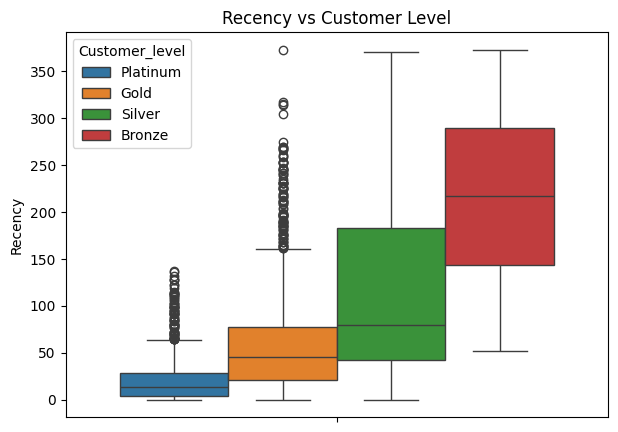

In [31]:
plt.figure(figsize=(7,5))
sns.boxplot(y=RFM_df['Recency'],hue=RFM_df['Customer_level'])
plt.title("Recency vs Customer Level")
plt.show()

In [32]:
# Understand customers level wise contribution

final_report=RFM_df.groupby('Customer_level')[['Recency','Frequency','Monetary','CustomerID']].agg({'Recency':'sum',
                                                                                                  'Frequency':'sum',
                                                                                                   'Monetary':'sum',
                                                                                                   'CustomerID':'nunique'}).reset_index()
final_report.rename(columns={'CustomerID':'Buyer_Count'},inplace=True)
final_report

,Customer_level,Recency,Frequency,Monetary,Buyer_Count
0,Platinum,25292,186771,4679301.27,1263
1,Gold,82794,52043,1077453.57,1363
2,Silver,107116,15605,262032.26,912
3,Bronze,181003,6896,17738.43,845


In [33]:
# Calculating the Buyer Percentage

final_report['Buyer_Percentage']=final_report['Buyer_Count'].apply(lambda x : round((x/final_report['Buyer_Count'].sum())*100,2))

In [34]:
final_report

,Customer_level,Recency,Frequency,Monetary,Buyer_Count,Buyer_Percentage
0,Platinum,25292,186771,4679301.27,1263,28.82
1,Gold,82794,52043,1077453.57,1363,31.10
2,Silver,107116,15605,262032.26,912,20.81
3,Bronze,181003,6896,17738.43,845,19.28


In [35]:
pip install squarify

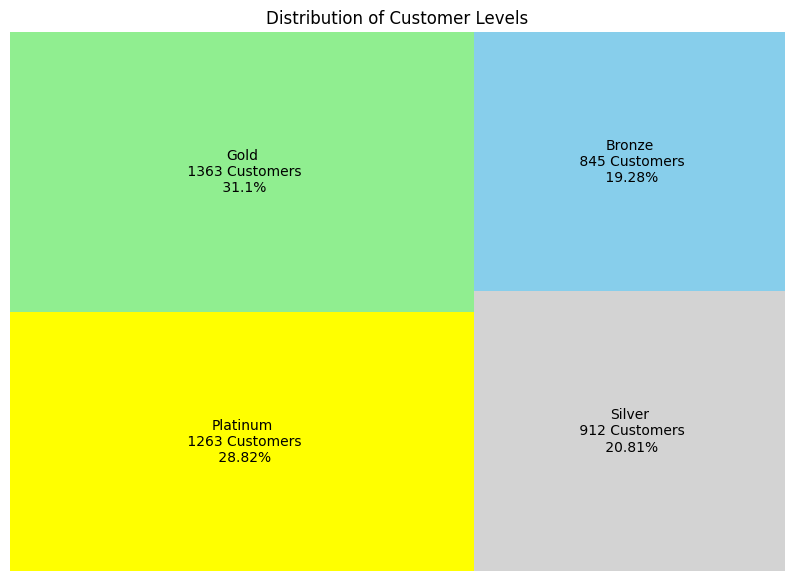

In [36]:
# Graphical Representation of Customer Level

import squarify

plt.figure(figsize=(10,7))
squarify.plot(sizes=final_report['Buyer_Count'],color=['yellow','lightgreen','lightgrey','skyblue'],
              label=[f"{final_report['Customer_level'][x]}\n {final_report['Buyer_Count'][x]} Customers\n {final_report['Buyer_Percentage'][x]}%" for x in range(len(final_report))])
plt.axis(False)
plt.title("Distribution of Customer Levels")
plt.show()

In [37]:
# Downloading the dataframe as csv for also implementing KMeans Clustering and Hierarchical clustering

RFM_df[['CustomerID','Recency','Frequency','Monetary']].to_csv('RFM_cleaned_file.csv')

# Observation

- There is **4383** number of unique customers in the given dataset.
- The customers are divided in the **4** segments such as Platinium,Gold, Silver and Bronze
- **Platinium** Customer having the highest score(**VIP customer/ most valuable and loyal customers.**) followed by Gold, Silver and Bronze
- The Gold customer count is more as compared to other group of customers.
- The profit from the Platinium customer is almost 125% higher than Gold Customers.
- To increase the visit of the customers from Bronze Cluster provide Limited-Time Offers like time-sensitive promotions to prompt immediate action.Also gather feedback to understand their disengagement and adjust strategies accordingly.
- Send targeted messages with special offers for customers to encourage return visits ans also sending personalized offers or updates based on the different customer groups to reignite their interest.
